In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)


In [4]:

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [10]:
from tensorflow.keras.models import Sequential

# Dictionary to store results
results = {}

# Model definition function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

Training with Adam optimizer...


d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Training with RMSprop optimizer...


d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Training with Adagrad optimizer...


d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


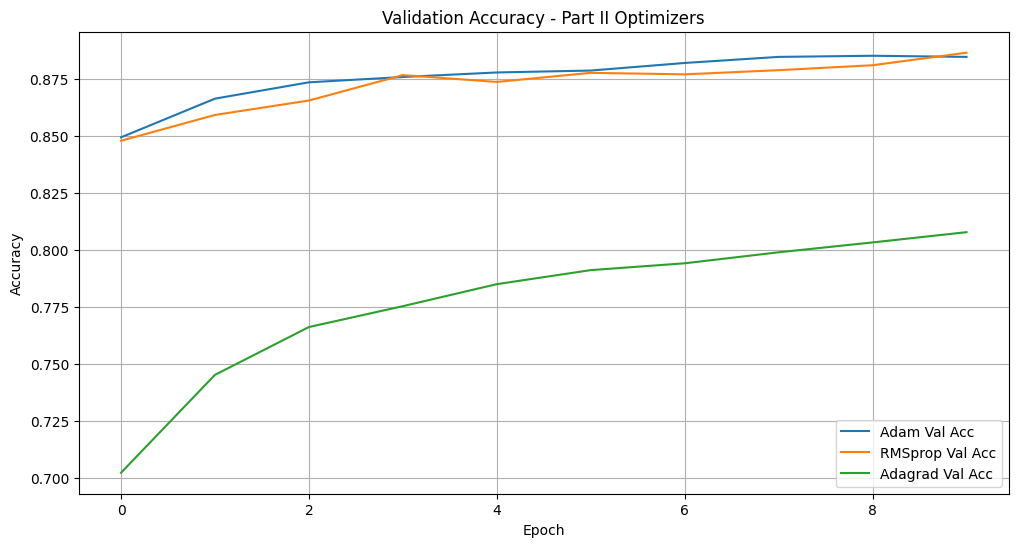

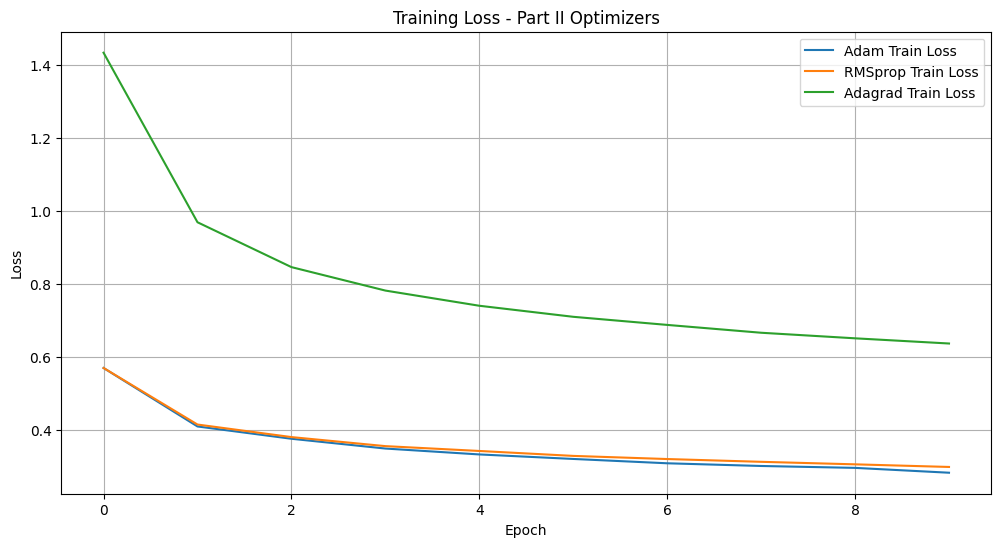

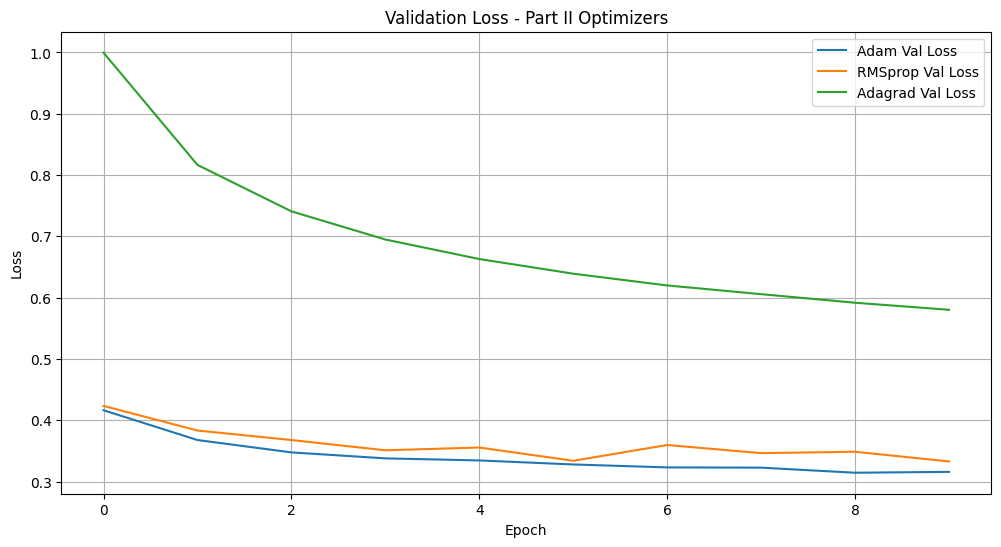


Final Results - Part II:
Adam       - Accuracy: 0.8803, F1 Score: 0.8789
RMSprop    - Accuracy: 0.8820, F1 Score: 0.8821
Adagrad    - Accuracy: 0.7953, F1 Score: 0.7908


In [13]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
import numpy as np
from sklearn.metrics import f1_score
tf.config.run_functions_eagerly(True)
optimizers_part2 = {
    "Adam": lambda: tf.keras.optimizers.Adam(),
    "RMSprop": lambda: tf.keras.optimizers.RMSprop(),
    "Adagrad": lambda: tf.keras.optimizers.Adagrad(),
}

results_part2 = {}

for name, get_optimizer in optimizers_part2.items():
    print(f"Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=get_optimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, verbose=0, validation_split=0.1)
    
    # Evaluate
    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results_part2[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "history": history.history
    }

# Visualization - Validation Accuracy
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['val_accuracy'], label=f"{name} Val Acc")
plt.title("Validation Accuracy - Part II Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Training Loss
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['loss'], label=f"{name} Train Loss")
plt.title("Training Loss - Part II Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Validation Loss
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['val_loss'], label=f"{name} Val Loss")
plt.title("Validation Loss - Part II Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Final performance table
print("\nFinal Results - Part II:")
for name, res in results_part2.items():
    print(f"{name:10} - Accuracy: {res['accuracy']:.4f}, F1 Score: {res['f1_score']:.4f}")

## Part II: Optimizer Analysis - Adam, RMSprop, Adagrad

In Part II, we compared the performance of three advanced optimizers: **Adam**, **RMSprop**, and **Adagrad** using a consistent neural network architecture and training setup.

### Final Performance Summary

| Optimizer | Accuracy | F1 Score |
|-----------|----------|----------|
| Adam      | 0.8803   | 0.8789   |
| RMSprop   | 0.8820   | 0.8821   |
| Adagrad   | 0.7953   | 0.7908   |

### Observations

- **RMSprop** performed the best among the three, achieving the highest accuracy (88.20%) and F1 score (88.21%). It effectively balanced stability and adaptability, likely benefiting from its ability to adjust learning rates for each parameter.
- **Adam** closely followed RMSprop, with an accuracy of 88.03% and F1 score of 87.89%. Given its combination of momentum and adaptive learning rates, Adam proved to be robust and reliable for this classification task.
- **Adagrad** underperformed relative to the others, with a lower accuracy (79.53%) and F1 score (79.08%). This may be due to its rapidly decaying learning rate, which can limit continued learning over epochs.

### Conclusion

Both **Adam** and **RMSprop** are highly effective optimizers for training deep learning models on image classification tasks like Fashion MNIST. While Adam is often the default choice due to its versatility, RMSprop may outperform it in some scenarios due to better handling of non-stationary objectives. Adagrad, despite its historical importance, is less suitable for this task compared to its counterparts.


In [15]:
from tensorflow.keras.models import Sequential

# Dictionary to store results
results = {}

# Model definition function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        # Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

Training with Adam optimizer...


d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Training with RMSprop optimizer...


d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Training with Adagrad optimizer...


d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\AAIT\deep-learning-optimizer-comparison\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


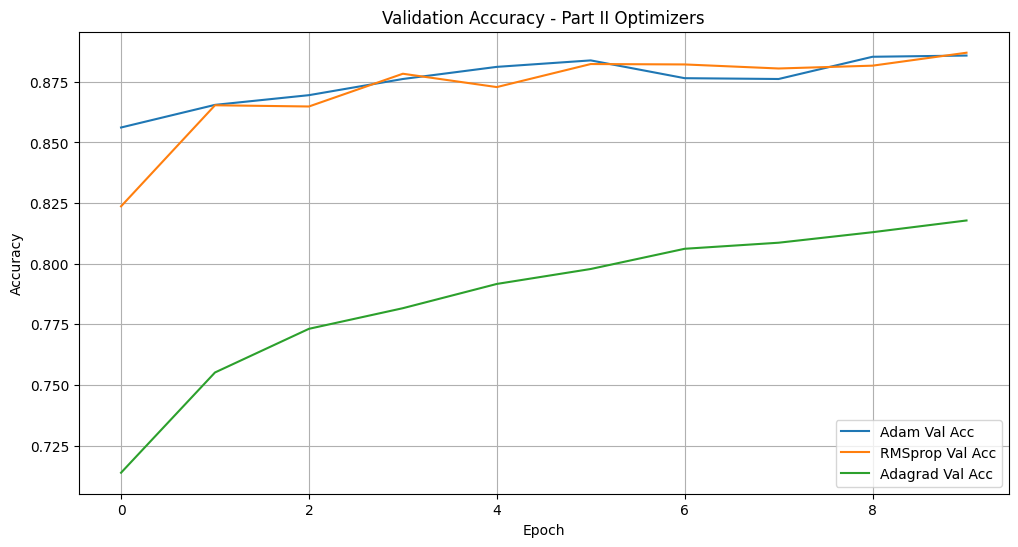

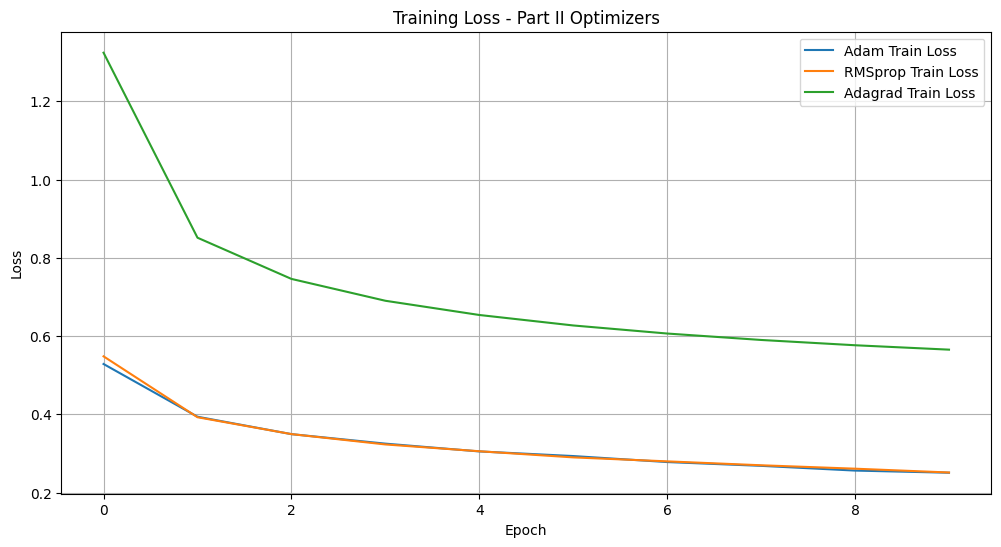

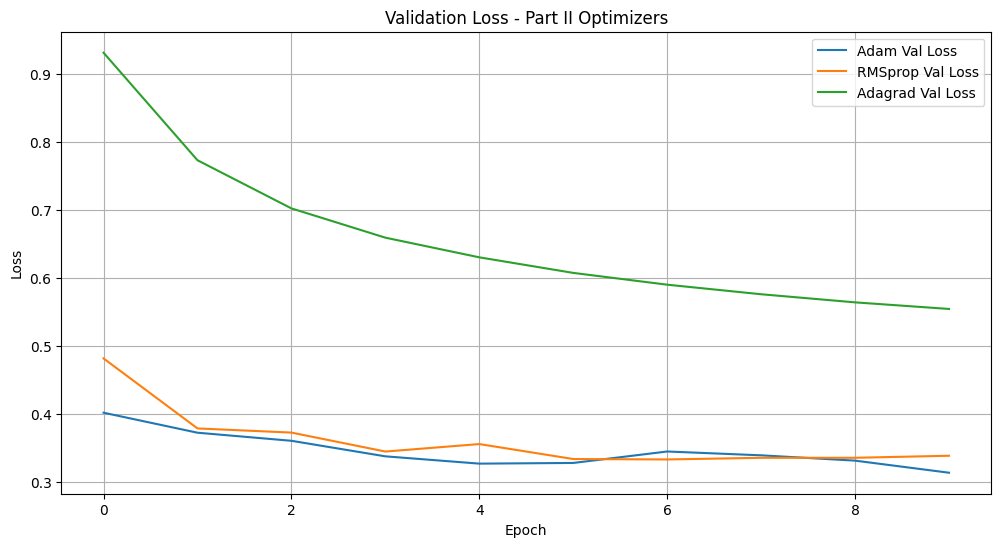


Final Results - Part II:
Adam       - Accuracy: 0.8815, F1 Score: 0.8822
RMSprop    - Accuracy: 0.8837, F1 Score: 0.8841
Adagrad    - Accuracy: 0.8054, F1 Score: 0.8029


In [16]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
import numpy as np
from sklearn.metrics import f1_score
tf.config.run_functions_eagerly(True)
optimizers_part2 = {
    "Adam": lambda: tf.keras.optimizers.Adam(),
    "RMSprop": lambda: tf.keras.optimizers.RMSprop(),
    "Adagrad": lambda: tf.keras.optimizers.Adagrad(),
}

results_part2 = {}

for name, get_optimizer in optimizers_part2.items():
    print(f"Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=get_optimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, verbose=0, validation_split=0.1)
    
    # Evaluate
    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results_part2[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "history": history.history
    }

# Visualization - Validation Accuracy
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['val_accuracy'], label=f"{name} Val Acc")
plt.title("Validation Accuracy - Part II Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Training Loss
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['loss'], label=f"{name} Train Loss")
plt.title("Training Loss - Part II Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Validation Loss
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['val_loss'], label=f"{name} Val Loss")
plt.title("Validation Loss - Part II Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Final performance table
print("\nFinal Results - Part II:")
for name, res in results_part2.items():
    print(f"{name:10} - Accuracy: {res['accuracy']:.4f}, F1 Score: {res['f1_score']:.4f}")